# # Lending Club Data 
Lending Club is a peer-to-peer lending platform that connects borrowers and investors. Since its inception in 2007, the platform has facilitated billions of dollars in loans and has become one of the largest online lending platforms in the world. The Lending Club Data Set is a comprehensive collection of data related to loans issued on the Lending Club platform.

The data set contains information on loans issued between 2007 and 2011, including loan amount, interest rate, loan term, credit score, and loan status (fully paid, charged off, etc.). It also includes information on the borrower, such as employment status, income, and debt-to-income ratio. The data set is updated regularly and provides a valuable resource for researchers and data analysts interested in the peer-to-peer lending industry.
.
# Understanding Data

This company is an online loan marketplace, offering personal, business and medical financing loans with low interest rates through a quick online platform. However, lending loans to high-risk applicants is the major cause of financial loss, referred to as credit loss. The aim of this study is to identify these high-risk applicants through exploratory data analysis (EDA) to reduce credit loss. The company's goal is to understand the key factors behind loan default and use this knowledge for portfolio and risk assessment. To enhance your understanding, you're encouraged to research the basics of risk analytics.

The Lending Club dataset contains information about loans issued by the Lending Club, a peer-to-peer lending platform. The data includes variables such as the number of delinquencies on the borrower's account, their credit utilization, annual income, employment information, FICO scores, loan amount and status and payment history. 



# Loan Consideration
overdue when no payment has been received for a period of 16 to 120 days. A default on a LendingClub loan occurs when no payment has been received for over 120 days, approximately four months. A charge-off by LendingClub occurs when the company does not anticipate receiving any further payments. This usually happens within 30 days of the loan entering a default state.

In [16]:
# Importing Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from datetime import datetime
import warnings
import re
warnings.filterwarnings("ignore")

In [144]:
# Reading Data From Loan.csv
data= pd.read_csv("loan.csv", low_memory=False)
print(data.shape)
print("\nThe first 5 rows of the loan data:")
# reading data head to visualize the dataset
print(data.head())



(39717, 111)

The first 5 rows of the loan data:
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0

# Understanding DataSet


In [145]:
# Lending Club data set contains two diffirent types of data from the point of view of data analysis
# 1- Categorical 
# 2- Numerical 

In [146]:

#Lendin club data set contain two diffirent data types from the point of view of Domain understanding 
# 1- Pre issue date
# 2- post Issue date 
# here is some example of usfull data we will focus on 
#usefull_var = ['loan_amnt','term','int_rate','grade','sub_grade','annual_inc','purpose','dti','emp_lenght','issue_d','home_ownership','verification_status']

In [147]:
# understanding main Columns = 111 columns
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [148]:
# understanding data shape 
print("The shape of the data:", data.shape)
# we have 111 columns and 39717 rows

The shape of the data: (39717, 111)


In [149]:
# understanding data statistics 
print("\nStatistics of the numerical columns:")
print(data.describe())
#average loan amount fundded by investor = 10397.448868
#Minmum amount was 500.00
#Maximum amount was 35000.00



Statistics of the numerical columns:
                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000

In [150]:
# running some analysis about specifict columns 
# loan_status provides categorical data 

print(data['loan_status'])
# our focus on Charge Off or defaulters, i prefer to keep all three categories even if current doesnt make any sense for now 
# and i will remove later when we go deeper in our analysis 

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: object


# Cleaning Data Set 

In [151]:
# Calculating Total of missing values 
data.isna().sum()


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [152]:
# Calculation Percentage of Missing Values 
round(data.isna().sum()/len(data.index), 2) *100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [153]:
# removing columns with missing values more than 90%
missings = data.columns[100*data.isna().sum()/len(data.index) > 90]
# Dropping usless columns 
data = data.drop(missings, axis=1)
print(data.shape)

# now our data looks better 

(39717, 55)


In [154]:
# Verification
100*(data.isnull().sum()/len(data.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [155]:
# dropping more columns 
data = data.drop(['desc', 'mths_since_last_delinq'], axis=1)


In [156]:
# final check after dopping previous columns 
100*(data.isna().sum()/len(data.index))


id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [157]:
# DROPPING MISSING VALUES IN ROWS
data.isna().sum(axis=1)
len(data[data.isna().sum(axis=1) > 5].index)


0

In [158]:
data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

In [159]:
# Dropping "CURENT" category from loan Status
data = data[data["loan_status"] != "Current"]
print(data['loan_status'])
# it doesn't make sense to keep CURRENT loans category 

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
5         Fully Paid
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 38577, dtype: object


# Data Conversion and preperation

In [160]:
# Now we will chose target variables and prepare them 
# Numeric value from ("emp_length")
data = data[~data['emp_length'].isna()]
data['emp_length'] = data['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
data['emp_length'] = data['emp_length'].apply(lambda x: pd.to_numeric(x))
data["emp_length"].dtypes
# quick employment length analysis 
print(data['emp_length'].describe())
#mean         5.061048
#min          1.000000
#max         10.000000



count    37544.000000
mean         5.061048
std          3.401750
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


In [161]:
# Preparing Date columns (issue_d) | Data conversion 
data['issue_d'] = data['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
data['month'] = data['issue_d'].apply(lambda x: x.month)
data['year'] = data['issue_d'].apply(lambda x: x.year)
# Group Observation ( TIME LNE )
data.groupby('year').year.count()
data.groupby('month').month.count()
# 
print(data['issue_d'])

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 37544, dtype: datetime64[ns]


In [162]:
# Interest rate conversion removing special characters 

# Interest rate conversion removing special characters 
data['int_rate'] = data['int_rate'].astype(str)
data['int_rate'] = data['int_rate'].str.rstrip('%)').astype(float) / 100

print(data['int_rate'])


0        0.1065
1        0.1527
2        0.1596
3        0.1349
5        0.0790
          ...  
39712    0.0807
39713    0.1028
39714    0.0807
39715    0.0743
39716    0.1375
Name: int_rate, Length: 37544, dtype: float64


In [163]:
# converting 'funded_amnt_inv' from float to int 
data['funded_amnt_inv'] = data['funded_amnt_inv'].round().astype(int)

# Univariant Analysis

# Categorial

In [164]:
# spotting categorical data from Dtype columns under object
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          37544 non-null  int64         
 1   member_id                   37544 non-null  int64         
 2   loan_amnt                   37544 non-null  int64         
 3   funded_amnt                 37544 non-null  int64         
 4   funded_amnt_inv             37544 non-null  int32         
 5   term                        37544 non-null  object        
 6   int_rate                    37544 non-null  float64       
 7   installment                 37544 non-null  float64       
 8   grade                       37544 non-null  object        
 9   sub_grade                   37544 non-null  object        
 10  emp_title                   36136 non-null  object        
 11  emp_length                  37544 non-null  int64     

Text(0.5, 1.0, 'Number of Loans to Grades')

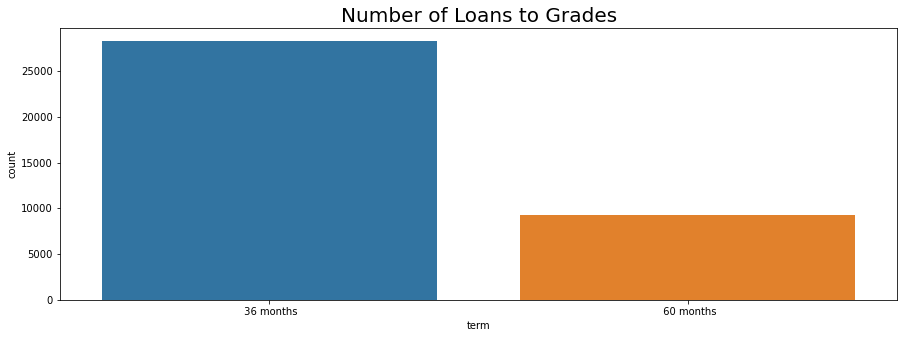

In [165]:
# TOTAL NUMBERS OF LOANS to terms 
plot_cat = lambda categories_var: sns.countplot(x=categories_var, data=data)
plt.figure(figsize=(15, 5))
plot_cat('term').set_title("Number of Loans to Grades", fontsize=20)
# Observation on the following chart:majority of borrowers has 36 month term 


Text(0.5, 1.0, 'Number of Loans to Home Ownership')

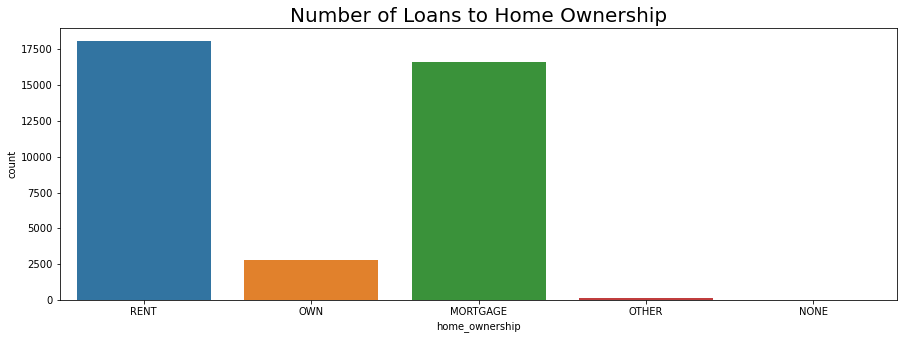

In [166]:
# TOTAL NUMBERS OF LOANS to Home Ownership 
plot_cat = lambda categories_var: sns.countplot(x=categories_var, data=data)
plt.figure(figsize=(15, 5))
plot_cat('home_ownership').set_title("Number of Loans to Home Ownership", fontsize=20)
# Data Understanding
# 1- renters = they down't own homes
# 2- own     = they own thier homes free and clear ( no mortgate, they usually have strong debt to income ratio )
# 3- Mortgage = they own thier homes but it is not paid off 
# Observation on the following chart:borrower own thier homes tends to borrow less than renters and home owner 
# making payments on thier homes 

Text(0.5, 1.0, 'Number of Loans to Verification Status')

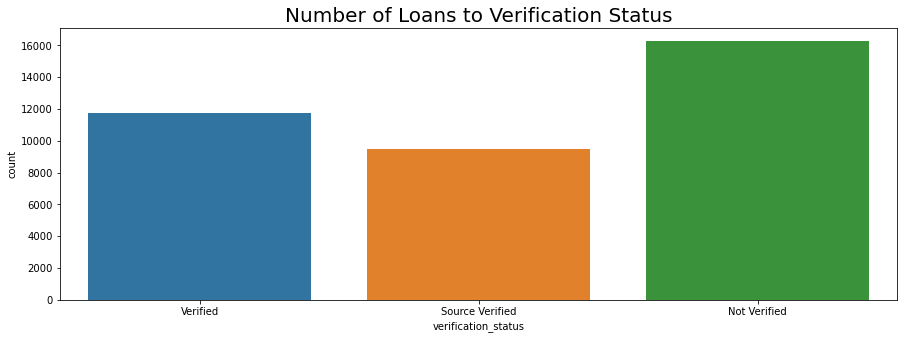

In [167]:
# TOTAL NUMBERS OF LOANS to Home Ownership 
plot_cat = lambda categories_var: sns.countplot(x=categories_var, data=data)
plt.figure(figsize=(15, 5))
plot_cat('verification_status').set_title("Number of Loans to Verification Status", fontsize=20)
# Sounds that employment verification factor it is not under control,Lenders usually relay on the credit profile
# such as fico score, DTI and income 


Text(0.5, 1.0, 'Number of Loans to Grades')

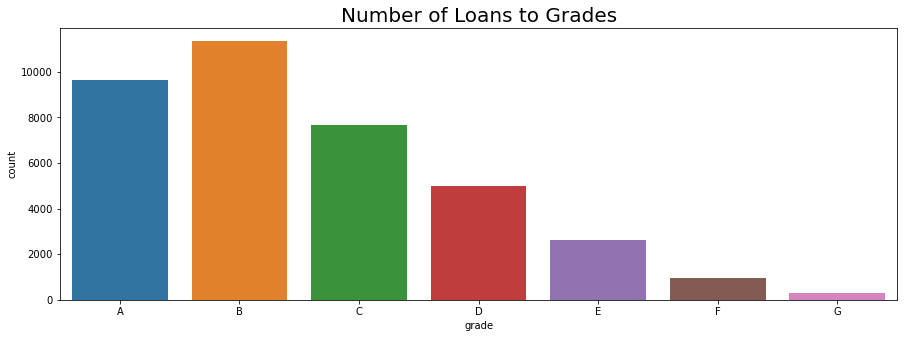

In [168]:
# TOTAL NUMBERS OF LOANS ACCORDING To THIER GRADES
plot_cat = lambda categories_var: sns.countplot(x=categories_var, data=data, order=["A", "B", "C","D","E","F","G"])
plt.figure(figsize=(15, 5))
plot_cat('grade').set_title("Number of Loans to Grades", fontsize=20)
# Observation on the following chart: Grade B,A and C are the largest in volume.


Text(0.5, 1.0, 'Number of Loans to Sub Grades')

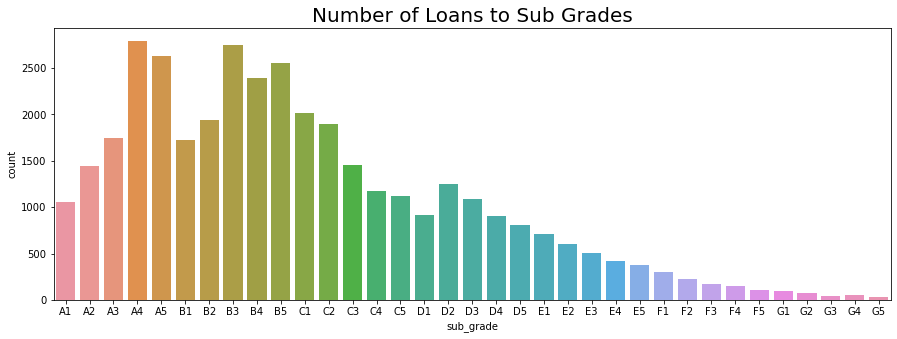

In [169]:
# TOTAL NUMBERS OF LOANS ACCORDING To THIER SUB_GRADES
# organizing sub grade in alphabetical order,
sub_grade_ordered = data['sub_grade'].unique().tolist()
sub_grade_ordered.sort()
plot_cat = lambda categories_var: sns.countplot(x=categories_var, data=data, order=sub_grade_ordered )
plt.figure(figsize=(15, 5))
plot_cat('sub_grade').set_title("Number of Loans to Sub Grades", fontsize=20)
# Observation on the following chart: Grade A4,A5 and B 3,4,5 are the largest in volume.

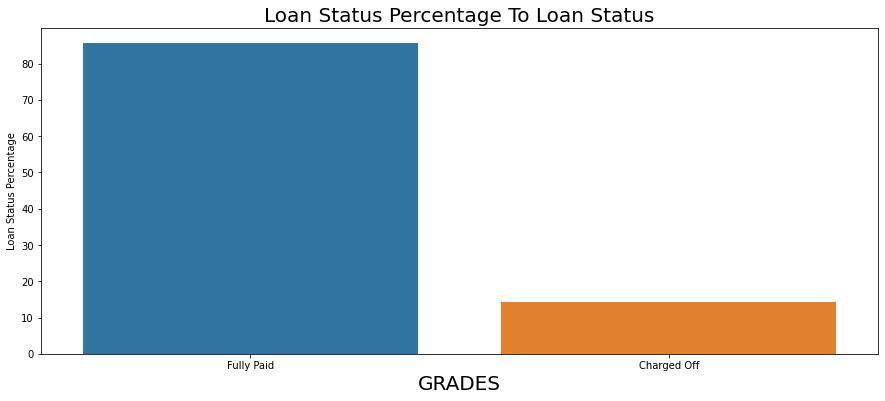

In [170]:
#Loan Status Percentage To Loan Status

df = data

n_loan_status = df['loan_status'].astype('category').cat.codes 
# Create a cross-tabulation of loan_status and grades
cross_tab = pd.crosstab(n_loan_status, df['loan_status'])
plt.figure(figsize=(15, 6))
#Plot the cross-tabulation as a bar plot
sns.barplot(x='loan_status', y=n_loan_status, data=data, estimator=lambda x: len(x) / len(data) * 100)
plt.xlabel('GRADES',fontsize = 20)
plt.ylabel('Loan Status Percentage')
plt.title("Loan Status Percentage To Loan Status", fontsize = 20)

plt.show()
# Observation 
# Fully Paid loan more than 80% charge off more than 10% finally current is too small,
#let's go deeper and analyse this columns more 


In [171]:
# let's see how many percent each category 
percentage = data["loan_status"].value_counts(normalize=True) * 100

# Show the results
print(percentage)

#Fully Paid     83.967276
#Charged Off    13.210086
#Current         2.822638
# TOTAL RISK IS 14%, our Goal is to find a major factor to REDUCE Charge off percentage 

Fully Paid     85.61954
Charged Off    14.38046
Name: loan_status, dtype: float64


In [172]:
loan_status_count = data["loan_status"].value_counts()
print(loan_status_count)

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64


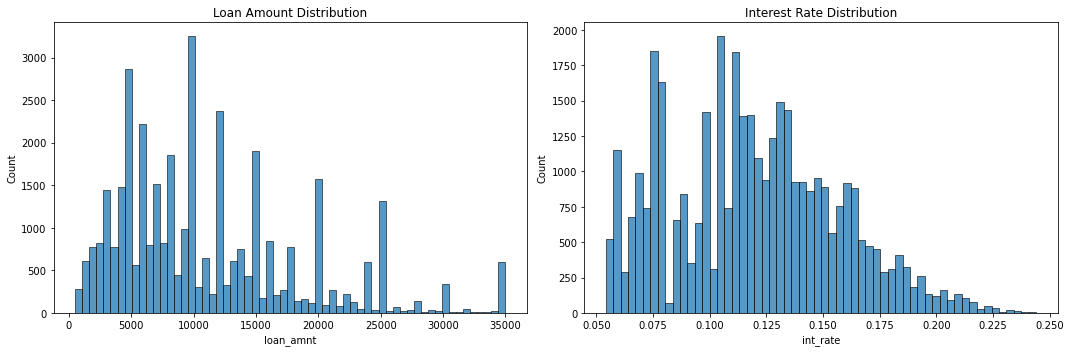

In [173]:
# Loan amount and int rate distribution 
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data['loan_amnt'], ax=axs[0]).set_title('Loan Amount Distribution')
sns.histplot(data['int_rate'], ax=axs[1]).set_title('Interest Rate Distribution')
plt.tight_layout()


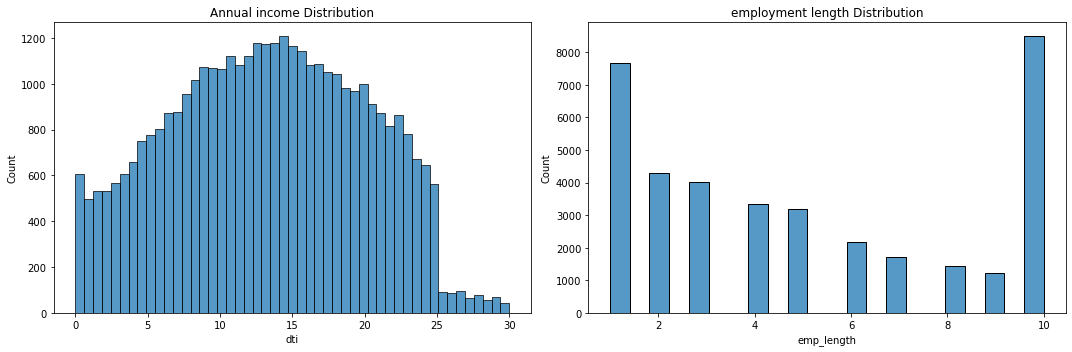

In [174]:
# Annual income and debts to income distribution 
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['dti'], ax=axs[0]).set_title('Annual income Distribution')
sns.histplot(data['emp_length'], ax=axs[1]).set_title('employment length Distribution')

plt.tight_layout()


#  Bivariate Analysis for categorical values

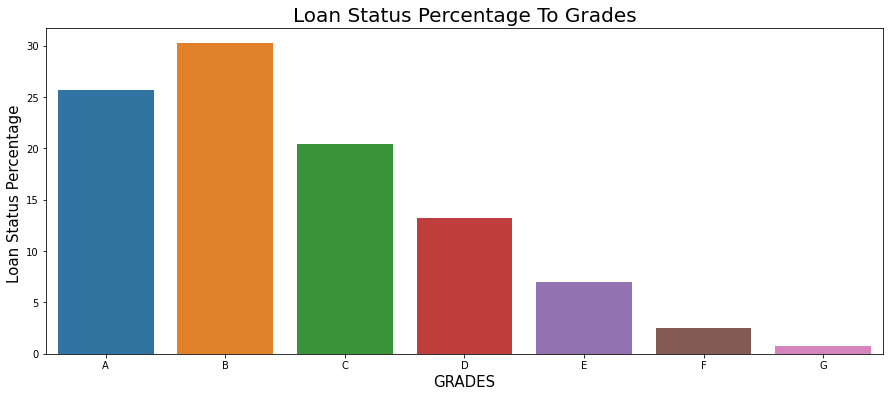

In [175]:
#Loan Status Percentag and loan grades
df = data
n_loan_status = df['loan_status'].astype('category').cat.codes 
# Create a cross-tabulation of loan_status and grades
cross_tab = pd.crosstab(n_loan_status, df['grade'])
plt.figure(figsize=(15, 6))
#Plot the cross-tabulation as a bar plot
sns.barplot(x='grade', y=n_loan_status, data=data,order=["A", "B", "C","D","E","F","G"], estimator=lambda x: len(x) / len(data) * 100)
plt.xlabel('GRADES',fontsize=15)
plt.ylabel('Loan Status Percentage ', fontsize=15)
plt.title('Loan Status Percentage To Grades', fontsize=20) 
plt.show()
# # Observation on the following chart: Grade B,A and C are the largest in volume.

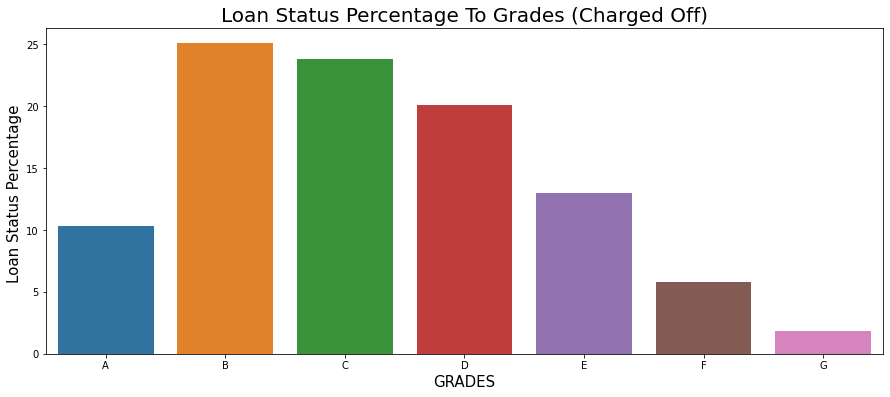

In [176]:
# Filter the data to include only charged-off loans
df_charge_off = df[df['loan_status'] == 'Charged Off']

n_loan_status = df_charge_off['loan_status'].astype('category').cat.codes 
# Create a cross-tabulation of loan_status and grades for charged-off loans only
cross_tab = pd.crosstab(n_loan_status, df_charge_off['grade'])
plt.figure(figsize=(15, 6))
# Plot the cross-tabulation as a bar plot
sns.barplot(x='grade', y=n_loan_status, data=df_charge_off,order=["A", "B", "C","D","E","F","G"], estimator=lambda x: len(x) / len(df_charge_off) * 100)
plt.xlabel('GRADES',fontsize=15)
plt.ylabel('Loan Status Percentage ', fontsize=15)
plt.title('Loan Status Percentage To Grades (Charged Off)', fontsize=20) 
plt.show()
# percentage wise grade D,E,F has high charge off percentage comparing to the amount of loans issued to those grades


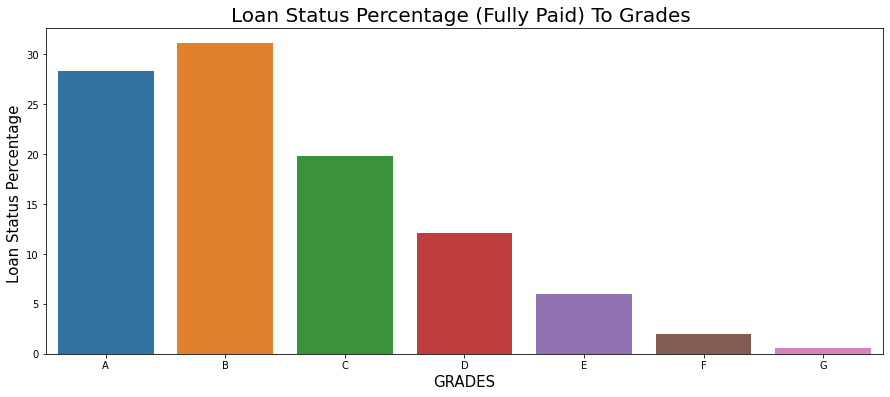

In [177]:
# Filter the data to include only fully paid loans
df_fully_paid = df[df['loan_status'] == 'Fully Paid']

n_loan_status = df_fully_paid['loan_status'].astype('category').cat.codes 
# Create a cross-tabulation of loan_status and grades for fully paid loans only
cross_tab = pd.crosstab(n_loan_status, df_fully_paid['grade'])
plt.figure(figsize=(15, 6))
# Plot the cross-tabulation as a bar plot
sns.barplot(x='grade', y=n_loan_status, data=df_fully_paid,order=["A", "B", "C","D","E","F","G"], estimator=lambda x: len(x) / len(df_fully_paid) * 100)
plt.xlabel('GRADES',fontsize=15)
plt.ylabel('Loan Status Percentage ', fontsize=15)
plt.title('Loan Status Percentage (Fully Paid) To Grades ', fontsize=20) 
plt.show()
# we have to go deeper in the data, but it is clear that there is a strong corellation between charge off and loan grades

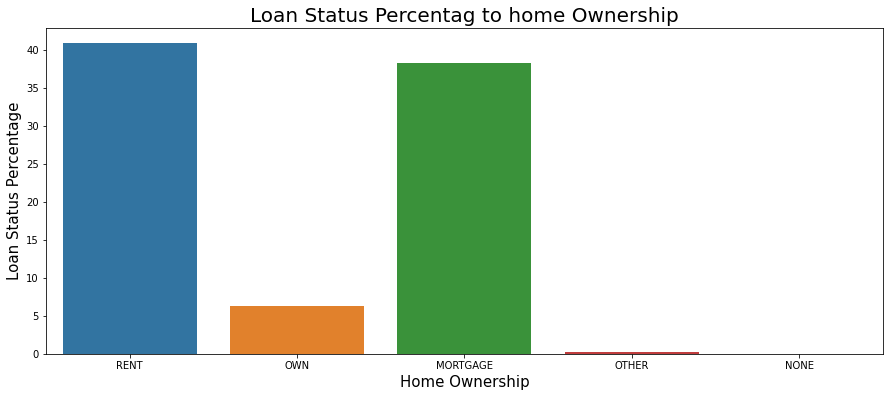

In [178]:
#Loan Status Percentag to home Ownership
cross_tab = pd.crosstab(n_loan_status, data['home_ownership'])
plt.figure(figsize=(15, 6))
#Plot the cross-tabulation as a bar plot
sns.barplot(x='home_ownership', y=n_loan_status, data=data, estimator=lambda x: len(x) / len(data) * 100)
plt.xlabel('Home Ownership', fontsize=15)
plt.ylabel('Loan Status Percentage', fontsize=15)
plt.title("Loan Status Percentag to home Ownership", fontsize=20)
plt.show()
#The homeownership column shows that the largest group of borrowers are those who rent, followed by those who own but still
#have a mortgage. Borrowers who own their homes free and clear tend to borrow less.

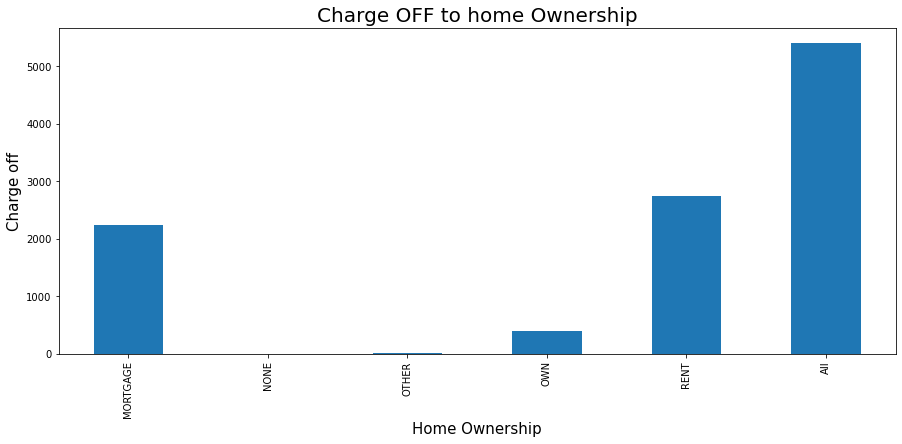

In [179]:
table_home = pd.crosstab(index=data["loan_status"], columns=data["home_ownership"], margins=True)

# Plot the pivot table as a stacked bar chart
plt.figure(figsize=(15, 6))
table_home.loc["Charged Off"].plot(kind='bar', stacked=True)

# Add a title to the chart

plt.xlabel('Home Ownership', fontsize=15)
plt.ylabel('Charge off', fontsize=15)
plt.title("Charge OFF to home Ownership", fontsize=20)

# Show the plot
plt.show()
# borrower under RENT status, are the majority of charge off 

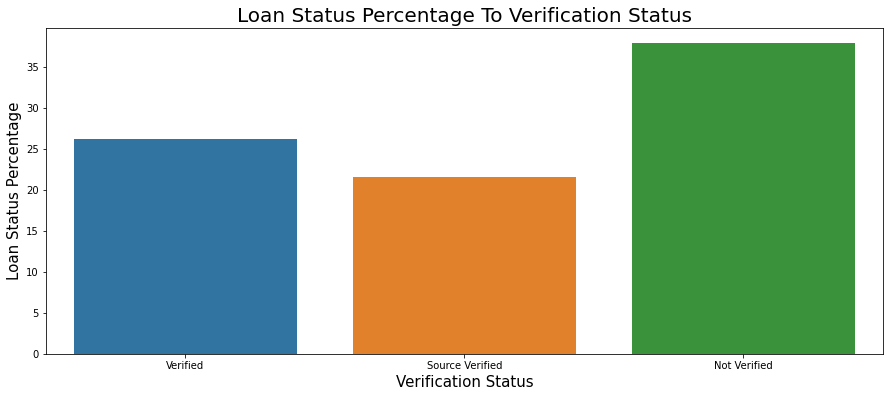

In [180]:
#Loan Status Percentage To Verification Status
cross_tab = pd.crosstab(n_loan_status, df['verification_status'])
plt.figure(figsize=(15, 6))
#Plot the cross-tabulation as a bar plot
sns.barplot(x='verification_status', y=n_loan_status, data=data, estimator=lambda x: len(x) / len(data) * 100)
plt.xlabel('Verification Status',fontsize = 15)
plt.ylabel('Loan Status Percentage',fontsize = 15)
plt.title("Loan Status Percentage To Verification Status", fontsize = 20)
plt.show()


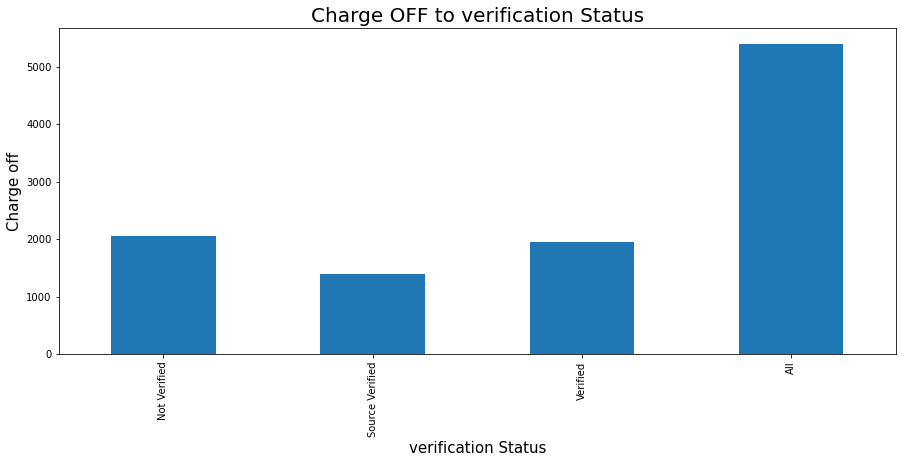

In [181]:
table_status = pd.crosstab(index=data["loan_status"], columns=data["verification_status"], margins=True)

# Plot the pivot table as a stacked bar chart
plt.figure(figsize=(15, 6))
table_status.loc["Charged Off"].plot(kind='bar', stacked=True)

# Add a title to the chart

plt.xlabel('verification Status', fontsize=15)
plt.ylabel('Charge off', fontsize=15)
plt.title("Charge OFF to verification Status", fontsize=20)

# Show the plot
plt.show()
# majority of charge off are verified 

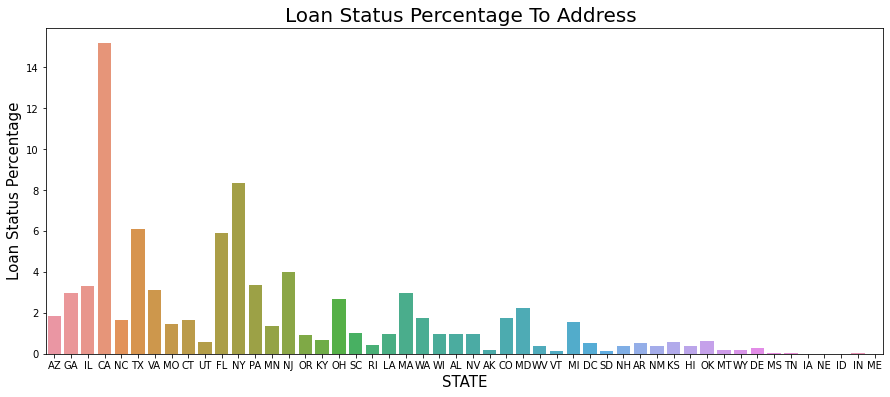

In [182]:
#Loan Status Percentage To Address
cross_tab = pd.crosstab(n_loan_status, df['addr_state'])
plt.figure(figsize=(15, 6))
#Plot the cross-tabulation as a bar plot
sns.barplot(x='addr_state', y=n_loan_status, data=data, estimator=lambda x: len(x) / len(data) * 100)
plt.xlabel('STATE', fontsize=15)
plt.ylabel('Loan Status Percentage', fontsize=15)
plt.title("Loan Status Percentage To Address ", fontsize=20)
plt.show()

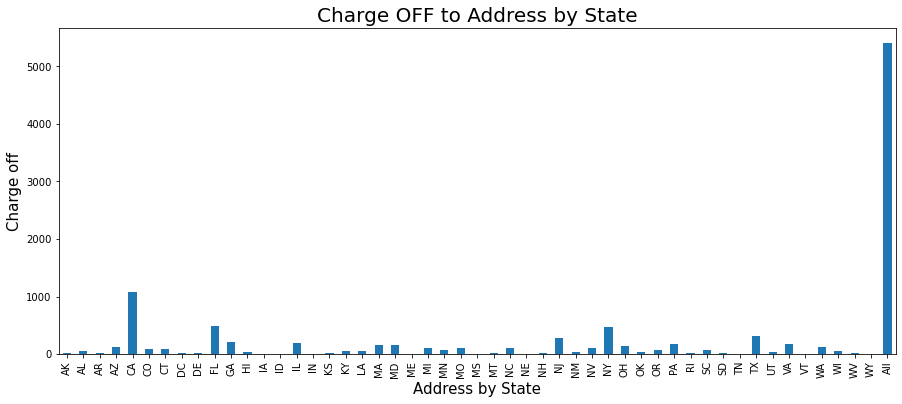

In [183]:
table_addr = pd.crosstab(index=data["loan_status"], columns=data["addr_state"], margins=True)

# Plot the pivot table as a stacked bar chart
plt.figure(figsize=(15, 6))
table_addr.loc["Charged Off"].plot(kind='bar', stacked=True)

# Add a title to the chart

plt.xlabel('Address by State', fontsize=15)
plt.ylabel('Charge off', fontsize=15)
plt.title("Charge OFF to Address by State", fontsize=20)

# Show the plot
plt.show()
# California, Newyork and florida are the highest in charge off 

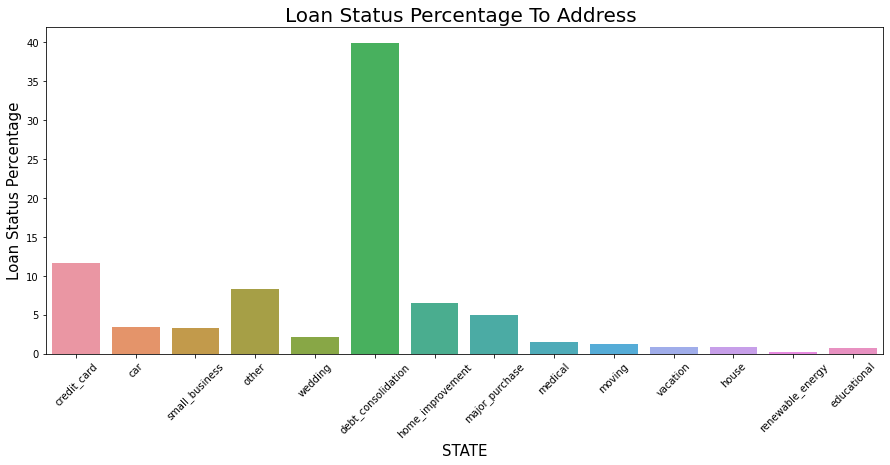

In [184]:
#Loan Status Percentage To Address
cross_tab = pd.crosstab(n_loan_status, data['purpose'])
plt.figure(figsize=(15, 6))
#Plot the cross-tabulation as a bar plot
sns.barplot(x='purpose', y=n_loan_status, data=data, estimator=lambda x: len(x) / len(data) * 100)
plt.xlabel('STATE', fontsize=15)
plt.ylabel('Loan Status Percentage', fontsize=15)
plt.title("Loan Status Percentage To Address ", fontsize=20)
plt.xticks(rotation=45)

plt.show()

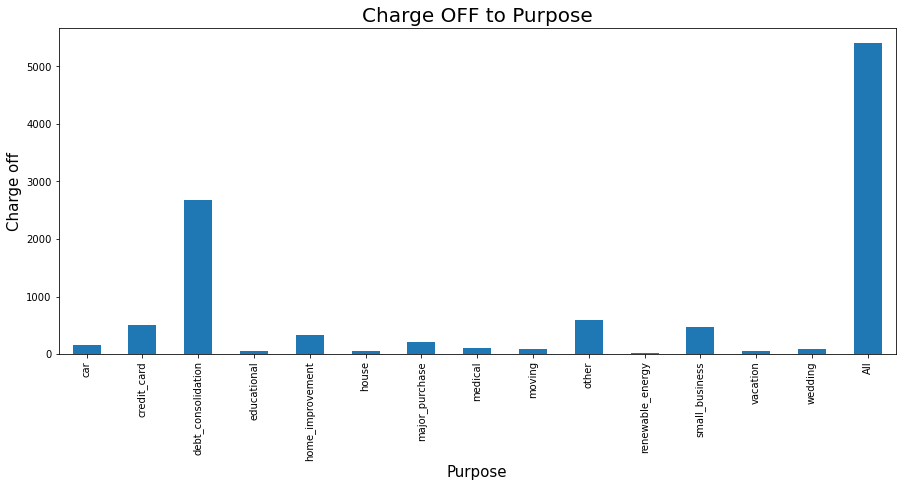

In [185]:
table_purose = pd.crosstab(index=data["loan_status"], columns=data["purpose"], margins=True)

# Plot the pivot table as a stacked bar chart
plt.figure(figsize=(15, 6))
table_purose.loc["Charged Off"].plot(kind='bar', stacked=True)

# Add a title to the chart

plt.xlabel('Purpose', fontsize=15)
plt.ylabel('Charge off', fontsize=15)
plt.title("Charge OFF to Purpose", fontsize=20)

# Show the plot
plt.show()
# very high propapilty for debt consilidation and credit cards pay off 

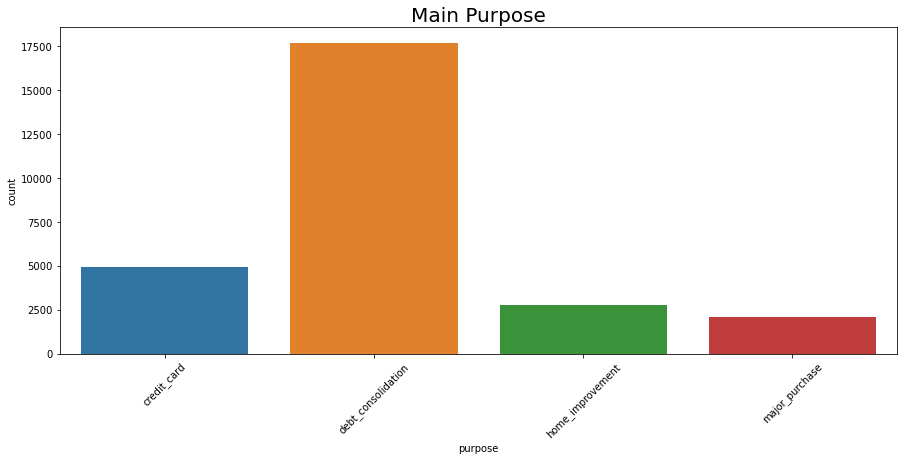

In [186]:
# Loan Main Purpose
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
plt.figure(figsize=(15, 6))
data = data[data['purpose'].isin(main_purposes)]
data['purpose'].value_counts()
sns.countplot(x=data['purpose']).set_title('Main Purpose', fontsize=20)

plt.xticks(rotation=45)
plt.show()

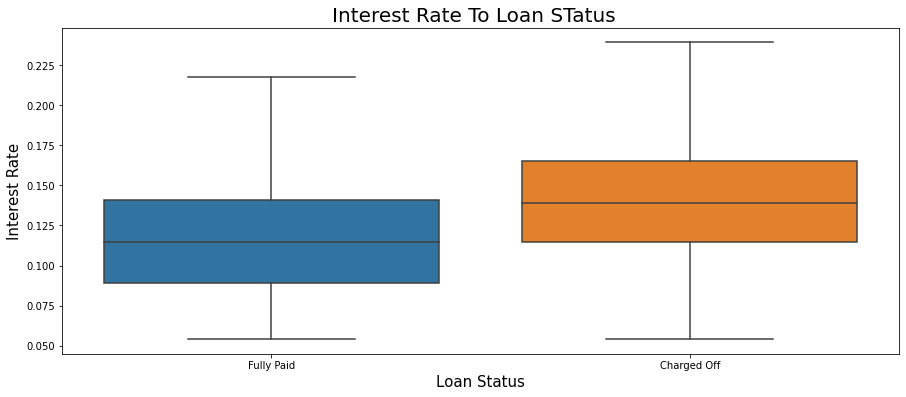

In [187]:
# Create a box plot of the relationship between the "charge off" category and the "int_rate" column
df_charge_off = data[data["loan_status"] == "Charged Off"] #df = df[df["loan_status"] != "Current"]
plt.figure(figsize=(15, 6))
sns.boxplot(x="loan_status", y="int_rate", data=data, showfliers=False)
plt.xlabel('Loan Status', fontsize=15)
plt.ylabel('Interest Rate', fontsize=15)
plt.title("Interest Rate To Loan STatus  ", fontsize=20)

# Show the plot
plt.show()
# Charge off majority between 0.11 and0.16, borrower has lower intereast rate tend to fully pay thier loans

Text(0.5, 0, 'Grades')

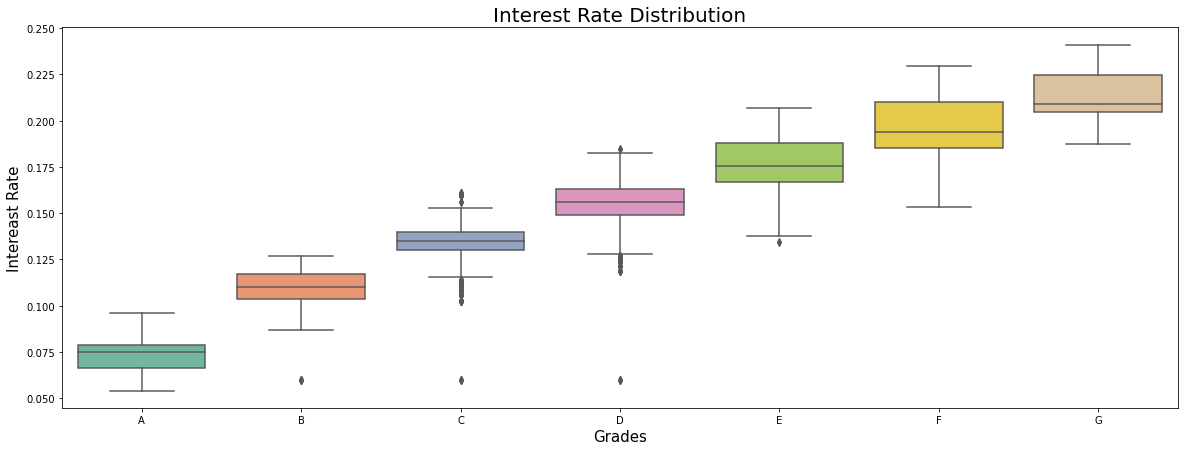

In [188]:

# interest rate distribution to loan grades 
plt.figure(figsize=(20,7))
sns.boxplot(x='grade', y='int_rate', data=data, palette = "Set2", order=['A','B','C','D','E','F','G']).set_title('Interest Rate Distribution', fontsize=20)
plt.ylabel('Intereast Rate', fontsize=15)
plt.xlabel('Grades', fontsize=15)



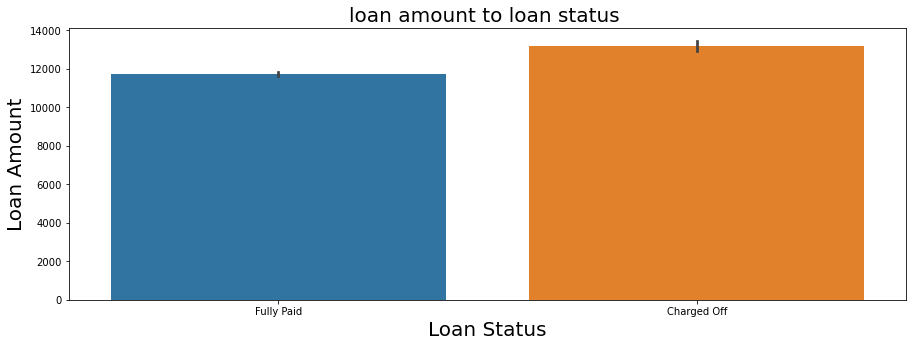

In [189]:
# PLotting relationship between loan amount and loan status ( defaulters) 


plot_categories = lambda categories_var: sns.barplot(y=categories_var, x='loan_status',data=data)
plt.figure(figsize=(15, 5))
plot_categories('loan_amnt').set_title("loan amount to loan status ", fontsize=20)
plt.xlabel("Loan Status", fontsize=20)
plt.ylabel("Loan Amount", fontsize=20)

# Show the plot
plt.show()
# higher charges off for loans bteween for loans less than 12500 and more than 12000, i don't see a strong relationship 

Text(0.5, 0, 'Loan Status')

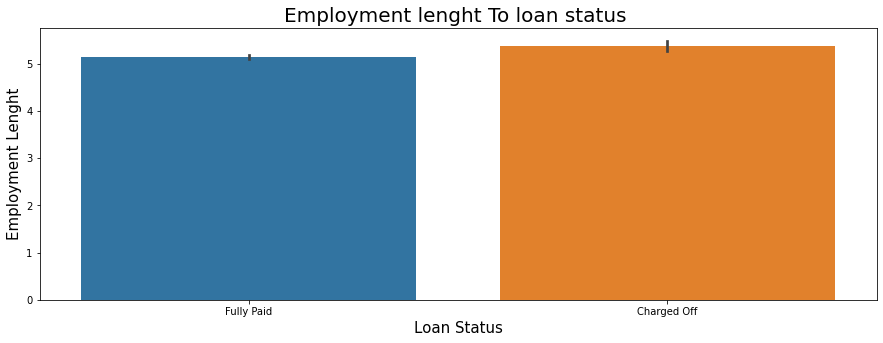

In [190]:
# PLotting relationship between Employment lenght and loan status ( defaulters) 


plot_categories = lambda categories_var: sns.barplot(y=categories_var, x='loan_status',data=data)
plt.figure(figsize=(15, 5))

plot_categories('emp_length').set_title("Employment lenght To loan status ", fontsize=20)
plt.ylabel("Employment Lenght", fontsize=15)
plt.xlabel("Loan Status", fontsize=15)
# no significant relationship 

Text(0.5, 0, 'Loan Status')

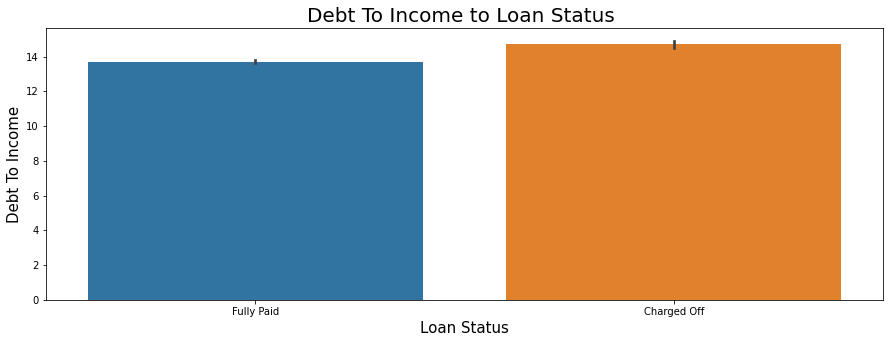

In [191]:
# PLotting relationship between Debt Ration and loan status ( defaulters) 


plot_categories = lambda categories_var: sns.barplot(y=categories_var, x='loan_status',data=data)
plt.figure(figsize=(15, 5))
plot_categories('dti').set_title("Debt To Income to Loan Status ", fontsize=20)
plt.ylabel("Debt To Income", fontsize=15)
plt.xlabel("Loan Status", fontsize=15)
# more charge off for borrower has high DTI, not very strong 

Text(0.5, 0, 'Loan Status')

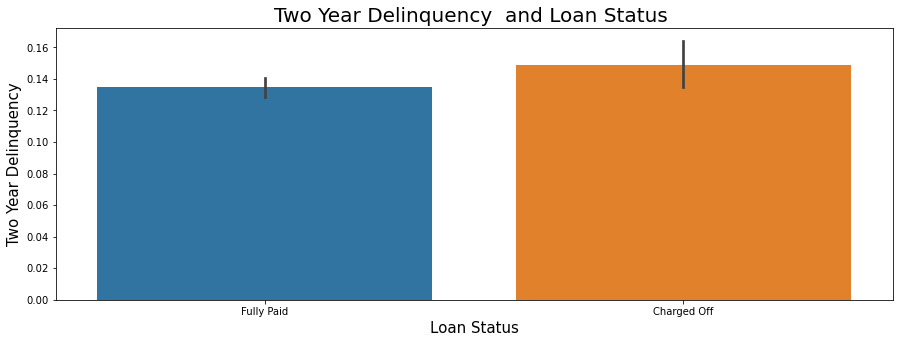

In [192]:
# PLotting relationship between Two Year Delinquency  and Loan Status ( defaulters) 

plot_categories = lambda categories_var: sns.barplot(y=categories_var, x='loan_status',data=data)
plt.figure(figsize=(15, 5))
plot_categories('delinq_2yrs').set_title("Two Year Delinquency  and Loan Status ", fontsize=20)
plt.ylabel("Two Year Delinquency", fontsize=15)
plt.xlabel("Loan Status", fontsize=15)
# there is a relationship between Two Year Delinquency and charge off 

Text(0.5, 0, 'Loan Status')

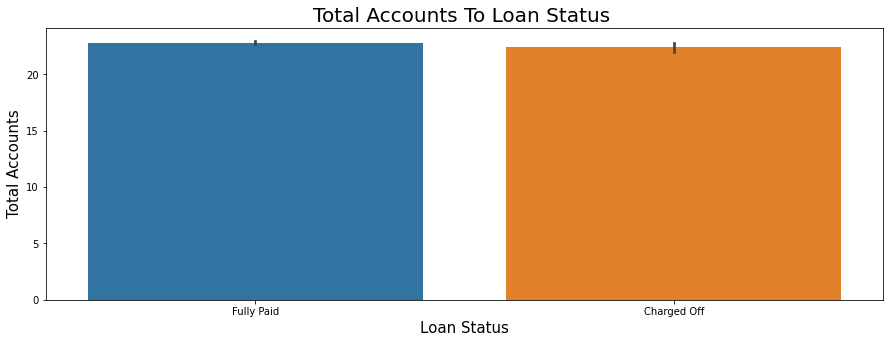

In [193]:
# PLotting relationship between Number of Credite Lines and Loan Status ( defaulters) 
plot_categories = lambda categories_var: sns.barplot(y=categories_var, x='loan_status',data=data)
plt.figure(figsize=(15, 5))
plot_categories('total_acc').set_title("Total Accounts To Loan Status ", fontsize=20)
plt.ylabel("Total Accounts", fontsize=15)
plt.xlabel("Loan Status", fontsize=15)
# total accounts has no significant change 

Text(0.5, 0, 'Loan Status')

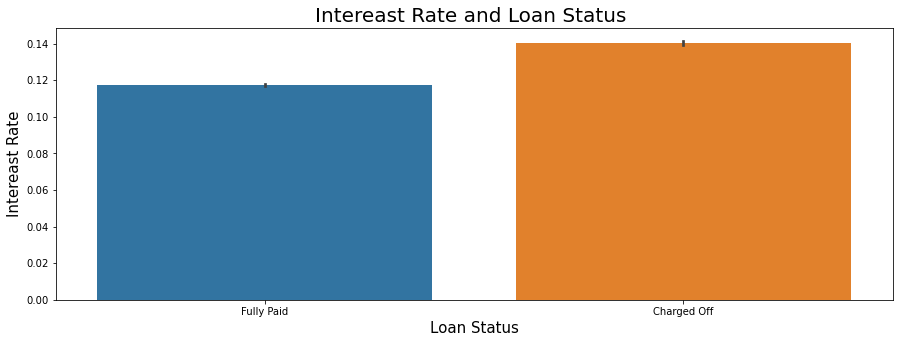

In [194]:
# PLotting relationship between Intereast Rate and Loan Status ( defaulters) 
plot_categories = lambda categories_var: sns.barplot(y=categories_var, x='loan_status',data=data)
plt.figure(figsize=(15, 5))
plot_categories('int_rate').set_title("Intereast Rate and Loan Status ", fontsize=20)
plt.ylabel("Intereast Rate", fontsize=15)
plt.xlabel("Loan Status", fontsize=15)
# there is a positive correlation between higher int rate and charge off 

Text(0.5, 0, 'Loan Status')

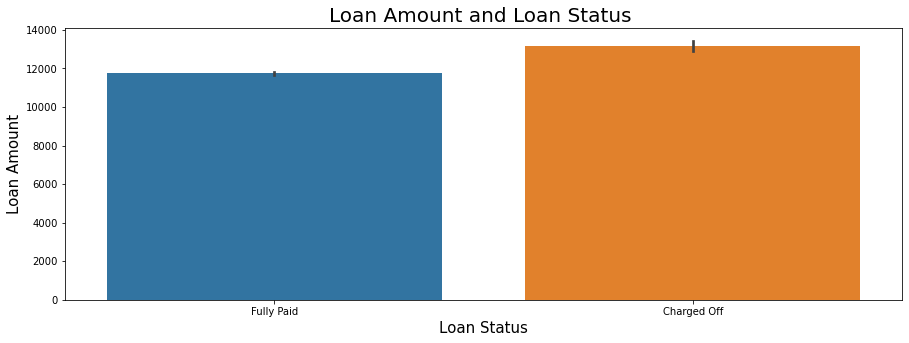

In [195]:
# PLotting relationship between Funded and Loan Status ( defaulters) 
plot_categories = lambda categories_var: sns.barplot(y=categories_var, x='loan_status',data=data)
plt.figure(figsize=(15, 5))
plot_categories('loan_amnt').set_title("Loan Amount and Loan Status ", fontsize=20)
plt.ylabel("Loan Amount", fontsize=15)
plt.xlabel("Loan Status", fontsize=15)

Text(0.5, 0, 'Loan Status')

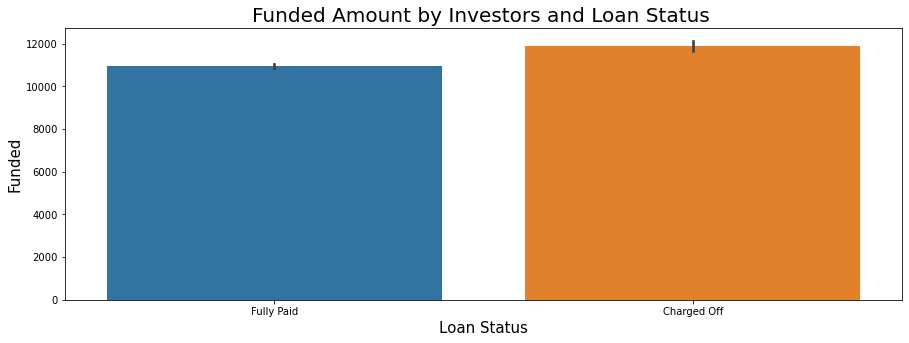

In [196]:
# PLotting relationship between Funded and Loan Status ( defaulters) 
plot_categories = lambda categories_var: sns.barplot(y=categories_var, x='loan_status',data=data)
plt.figure(figsize=(15, 5))
plot_categories('funded_amnt_inv').set_title("Funded Amount by Investors and Loan Status ", fontsize=20)
plt.ylabel("Funded", fontsize=15)
plt.xlabel("Loan Status", fontsize=15)

# 

# Examining in details 
The distribution plot shows that there are very few Lending Club applicants who receive the lowest interest rate (A) in redlined areas. The majority of applicants are given a medium interest rate (B, C, or D). Only a small number of applicants have to contend with extremely high interest rates (E, F, or G). This distribution implies that Lending Club may not be taking into account redlining when assessing the risk of credit default.

In [197]:
# now we understand that loan grades, sub grades, purpose and int rate has a strong effect, let's go deeper and examine more 

Text(0.5, 1.0, 'Loan Amount to Loan Status')

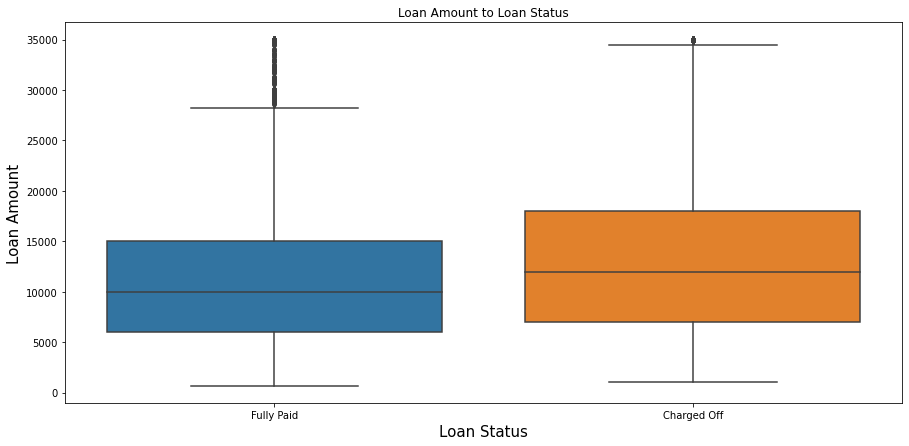

In [198]:
# resault shows that loan amount not a good factor to determine charge off predection
plt.figure(figsize=(15, 7))
sns.boxplot(x="loan_status", y="loan_amnt", data=data)
plt.ylabel("Loan Amount", fontsize=15)
plt.xlabel("Loan Status", fontsize=15)
plt.title('Loan Amount to Loan Status')

In [199]:
# data grouping 
data.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3730.0,13182.513405,7973.992698,1000.0,7000.0,12000.0,18000.0,35000.0
Fully Paid,23709.0,11742.795985,7236.815157,700.0,6000.0,10000.0,15000.0,35000.0


In [200]:
#returning unique values in the 'grade
data['grade'].unique()

array(['B', 'C', 'D', 'A', 'E', 'F', 'G'], dtype=object)

Text(0.5, 1.0, 'Grades to Loan Status')

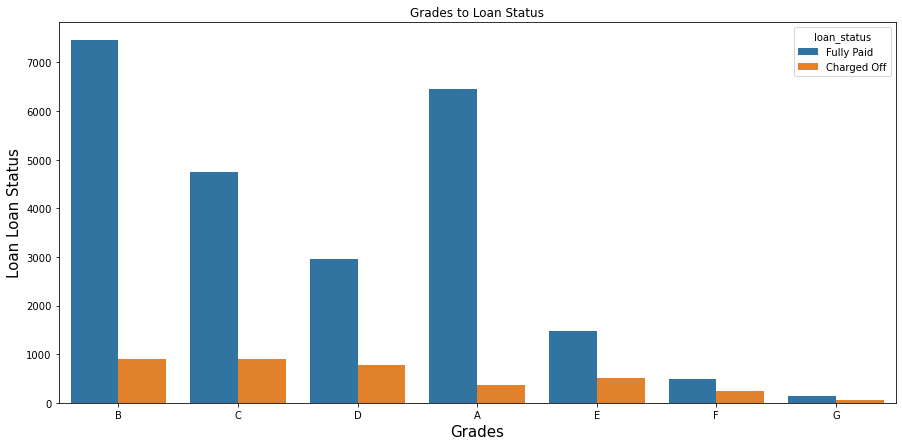

In [201]:
# Creating bar plot for grade and loan status 
plt.figure(figsize=(15, 7))
sns.countplot(x='grade', hue='loan_status', data=data)
plt.ylabel("Loan Loan Status", fontsize=15)
plt.xlabel("Grades", fontsize=15)
plt.title('Grades to Loan Status')
#grades E F and G has very high voulme of charge off

In [202]:
#calculating the percentage of charge off status in loans with grade "A" 
data[data['grade']=="A"].groupby("loan_status")['grade'].count()*100/len(data[data['grade']=="A"])
# 5 %

loan_status
Charged Off     5.267019
Fully Paid     94.732981
Name: grade, dtype: float64

In [203]:
#calculating the percentage of charge off status in loans with grade "B" 
data[data['grade']=="B"].groupby("loan_status")['grade'].count()*100/len(data[data['grade']=="B"])

loan_status
Charged Off    10.734396
Fully Paid     89.265604
Name: grade, dtype: float64

In [204]:
#calculating the percentage of charge off status in loans with grade "C" 
data[data['grade']=="C"].groupby("loan_status")['grade'].count()*100/len(data[data['grade']=="C"])

loan_status
Charged Off    15.825933
Fully Paid     84.174067
Name: grade, dtype: float64

In [205]:
#calculating the percentage of charge off status in loans with grade "D" 
data[data['grade']=="D"].groupby("loan_status")['grade'].count()*100/len(data[data['grade']=="D"])

loan_status
Charged Off    20.75725
Fully Paid     79.24275
Name: grade, dtype: float64

In [206]:
#calculating the percentage of charge off status in loans with grade "E" 
data[data['grade']=="E"].groupby("loan_status")['grade'].count()*100/len(data[data['grade']=="E"])

loan_status
Charged Off    25.829146
Fully Paid     74.170854
Name: grade, dtype: float64

In [207]:
# class F is the higesht rate in charge off comparing to percentage of loans issued to the same class
data[data['grade']=="F"].groupby("loan_status")['grade'].count()*100/len(data[data['grade']=="F"])
## CLASS F charge of has the largest percentage of defaulters 32%

loan_status
Charged Off    32.64177
Fully Paid     67.35823
Name: grade, dtype: float64

In [208]:
# # class G is the 2nd higesht rate in charge off comparing to percentage of loans issued to the same class
data[data['grade']=="G"].groupby("loan_status")['grade'].count()*100/len(data[data['grade']=="G"])
# 29% 

loan_status
Charged Off    29.186603
Fully Paid     70.813397
Name: grade, dtype: float64

In [209]:
# we will do the same for sub grade 
data["sub_grade"].unique

<bound method Series.unique of 0        B2
6        C5
10       C3
11       B5
12       C1
         ..
39711    B1
39712    A4
39713    C1
39714    A4
39716    E2
Name: sub_grade, Length: 27439, dtype: object>

Text(0.5, 1.0, 'Sub Grades')

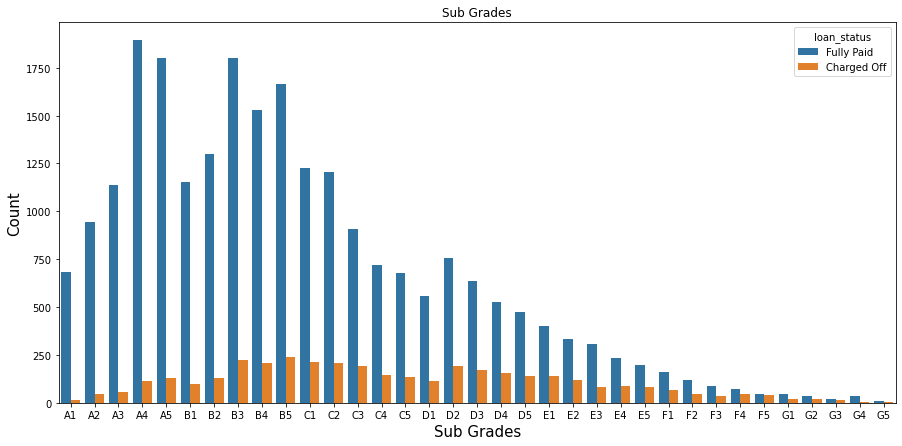

In [210]:
# Verifiying resault of the grades from sub grades
sub_order = sorted(data['sub_grade'].unique())
plt.figure(figsize=(15,7))
sns.countplot(x='sub_grade', hue="loan_status", order=sub_order, data=data)
plt.ylabel("Count", fontsize=15)
plt.xlabel("Sub Grades", fontsize=15)
plt.title('Sub Grades')

# verified grade F and G has the most charge off percentage 

Text(0.5, 1.0, 'Employment Lenght')

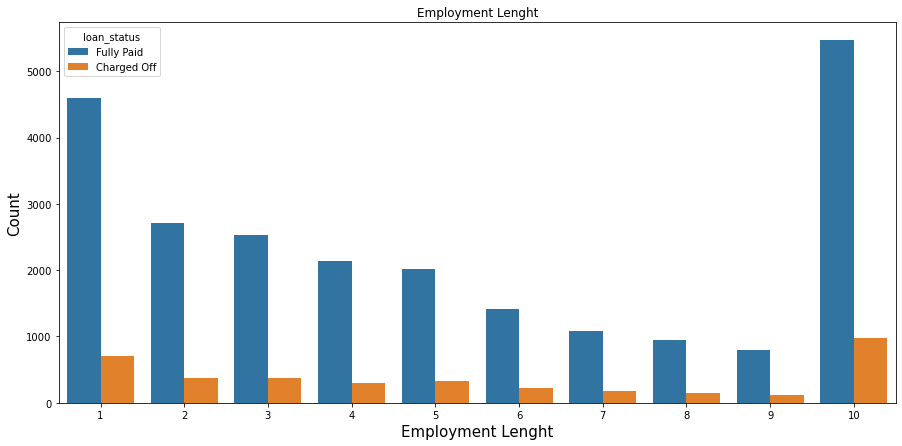

In [211]:
# relationship between charge of/fully paid and employment lenght 
plt.figure(figsize=(15,7))
sns.countplot(x='emp_length', hue='loan_status', data=data)
plt.ylabel("Count", fontsize=15)
plt.xlabel("Employment Lenght", fontsize=15)
plt.title('Employment Lenght')


In [212]:
# returning unique value of emp_lenght
data['emp_length'].unique()

array([10,  8,  5,  1,  3,  4,  6,  2,  9,  7], dtype=int64)

In [213]:
# longer time in employment increase the propapily of paying off the loan specially 10 years or more
data[data['emp_length']==10].groupby("loan_status")['emp_length'].count()*100/len(data[data['emp_length']==10])

# charge off is 15% for employment len more than 10 years 

loan_status
Charged Off    15.087011
Fully Paid     84.912989
Name: emp_length, dtype: float64

In [214]:
# one year in employment tends to do better than 2-9 years in the job, i don't see strong effect 
data[data['emp_length']==1].groupby("loan_status")['emp_length'].count()*100/len(data[data['emp_length']==1])
# 13% charge off for one year employment 

loan_status
Charged Off    13.2705
Fully Paid     86.7295
Name: emp_length, dtype: float64

Text(0.5, 1.0, 'Verification Status')

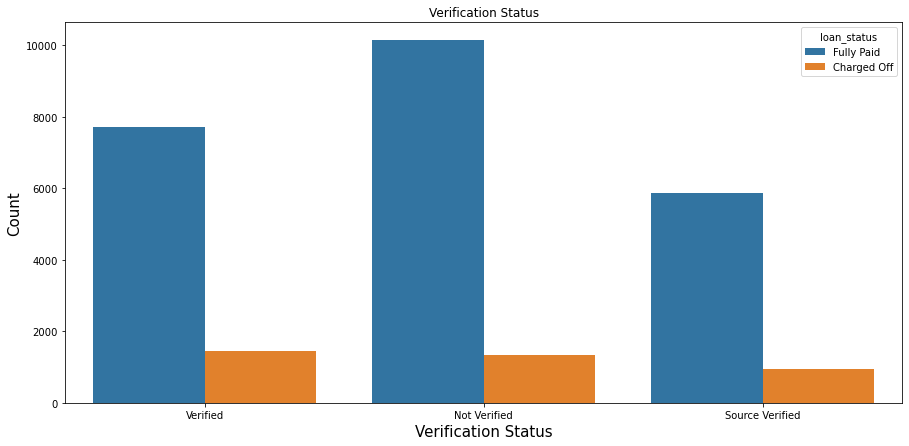

In [215]:
# company verification is not suffecient at all 
plt.figure(figsize=(15,7))
sns.countplot(x='verification_status', hue='loan_status', data=data)
plt.ylabel("Count", fontsize=15)
plt.xlabel("Verification Status", fontsize=15)
plt.title('Verification Status')

In [216]:
# lending club loan process starts with a borrower request amount of 
#loan and the lender may approves the same amount or offer less amount
# let's see if this has effect 


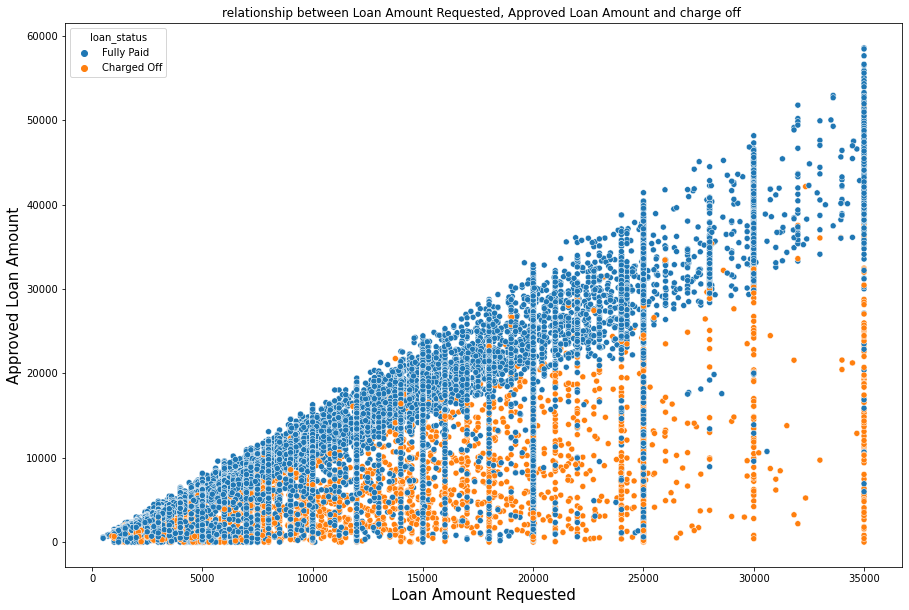

In [217]:
# plotting relationship between loan amount requested by the borrower and counter offer by investor 
plt.figure(figsize=(15, 10))
df = df[df["loan_status"] != "Current"]
sns.scatterplot(x="funded_amnt", y="total_pymnt_inv", hue="loan_status", data=df)
plt.xlabel("Loan Amount Requested", fontsize=15)
plt.ylabel("Approved Loan Amount", fontsize=15)
plt.title("relationship between Loan Amount Requested, Approved Loan Amount and charge off ")
plt.show()
#Strong Relation Observed between Loan Amount Requested and Approved Loan Amount
#Increase in Charge Off for Borrowers Receiving a Lower Counter Offer than Requested
#spike in charge off for borrower who recived lower amount of loan than amount requested







In [218]:

# getting a fresh data for correlation matrix 

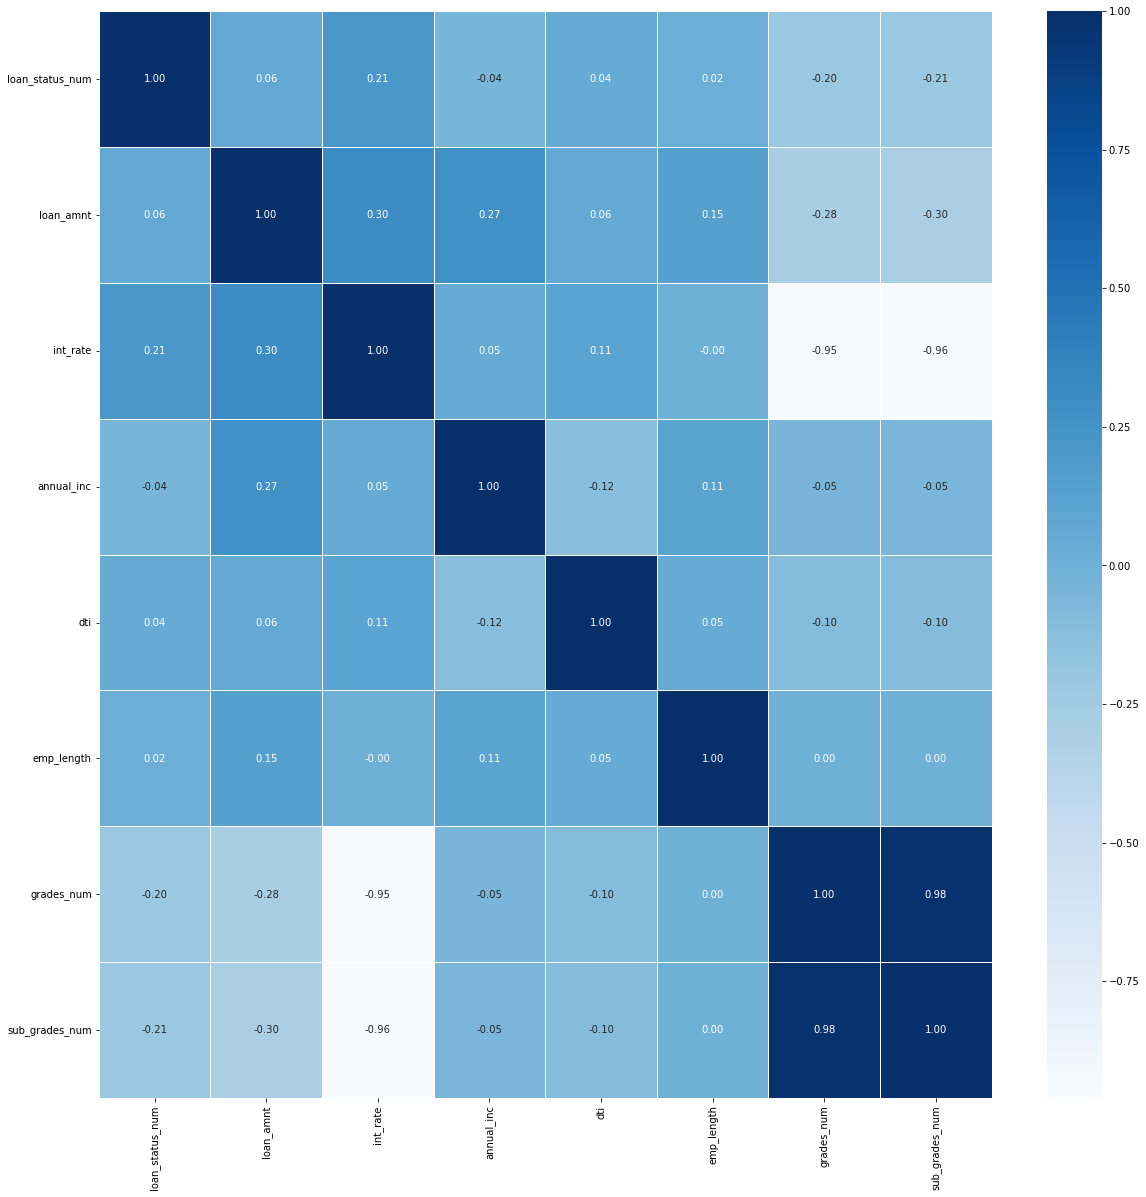

In [219]:
df_1=df
# maping grades to spot charge off " G Lowest grade = 1 "
grade_mapping = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}
df_1['grades_num'] = df['grade'].map(grade_mapping)
# maping grades to spot charge off " G5 Lowest grade = 1, A1 = 35 ", to spot correlation to charge off 
sub_grade_mapping = {'A1': 35, 'A2': 34, 'A3': 33, 'A4': 32, 'A5': 31,
                     'B1': 30, 'B2': 29, 'B3': 28, 'B4': 27, 'B5': 26,
                     'C1': 25, 'C2': 24, 'C3': 23, 'C4': 22, 'C5': 21,
                     'D1': 20, 'D2': 19, 'D3': 18, 'D4': 17, 'D5': 16,
                     'E1': 15, 'E2': 14, 'E3': 13, 'E4': 12, 'E5': 11,
                     'F1': 10, 'F2': 9, 'F3': 8, 'F4': 7, 'F5': 6,
                     'G1': 5, 'G2': 4, 'G3': 3, 'G4': 2, 'G5': 1}
df_1['sub_grades_num'] = df['sub_grade'].map(sub_grade_mapping)
loan_status_mapping = {'Fully Paid': 0, 'Charged Off': 1}
df_1['loan_status_num'] = df_1['loan_status'].map(loan_status_mapping)
corr_col = ['loan_status_num','loan_amnt', 'int_rate','annual_inc','dti','emp_length','grades_num','sub_grades_num']
corr_mat = df[corr_col].corr()
    
plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat, annot=True, fmt='.2f', linewidth=.5, cmap='Blues')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

# Conclusion and findings 

The study analyzed the pre-loan information of the dataset, ignoring the post-loan information as it is not relevant to the lender's decision-making process. The overall risk was found to be 14%. The goal was to identify the major factors affecting the loan outcome.

Loan Repayment: The majority of fully paid loans were more than 80%, while loans with more than 10% charge off were less frequent.

Loan Grades: The largest volume of loans belonged to grades B, A, and C. However, grades F and G had the highest default rate of 32% and 29%, respectively.

Home Ownership: Borrowers who rent showed the highest charge-off rate, while those who own their homes had the lowest. Borrowers still paying for their homes through mortgage had higher charge-off rates and higher debt-to-income ratios.

Loan Purpose: The highest probability of loan default was observed for debt consolidation and credit card payoff loans.

Charge-off Rate: The majority of charge-off rates were between 0.11 and 0.16. Borrowers with lower interest rates tended to fully repay their loans.

Employment Length: A charge-off rate of 15% was observed for borrowers with employment length over 10 years.

Loan Amount: A strong relationship was observed between the loan amount requested and the approved loan amount. Borrowers who received a lower amount than what they requested showed a spike in the charge-off rate.




# Recommendations
Based on the findings of the study, the following recommendations are proposed:

Raise the interest rate for loans with purposes of debt consolidation and credit card payoff.

Decrease the amount of loan funded by 30% for borrowers with grades F and G and their subclasses.

Lower the interest rate for borrowers with grades A, B, and C.

Set the highest interest rate for borrowers with unverified income.

Decrease the interest rate for home owners with fully paid homes and raise it for home renters.

